## Importing Packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import json
import urllib.request
import seaborn as sns


## Importing the dataset

In [3]:
with urllib.request.urlopen("https://storage.googleapis.com/street_group_data_science/street_group_data_science_bedrooms_test.json") as url:
    df = pd.read_json(url.read().decode(),lines=True)

In [4]:
df

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154,0
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445,0
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323,0
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787,2
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258,1
...,...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611,3
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064,5
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065,4
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915,4


## Data Insights

In [5]:
df.head()

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
0,Flats/Maisonettes,39.0,1,1,103000,126000,52.164661,-1.856154,0
1,Flats/Maisonettes,24.0,1,1,36000,44000,52.523281,-2.054445,0
2,Flats/Maisonettes,25.0,1,1,187000,229000,51.386343,-0.108323,0
3,Flats/Maisonettes,27.0,1,1,234000,350000,51.416946,-0.151787,2
4,Flats/Maisonettes,29.0,1,1,185000,277000,52.915728,-1.475258,1


In [6]:
df.describe()

,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000
mean,95.110280,4.731386,4.644062,3.258840e+05,3.768346e+05,52.341382,-1.304311,2.869454
std,77.209212,1.662938,1.677080,2.946820e+05,3.555607e+05,1.130432,1.298806,0.978529
min,0.000000,1.000000,0.000000,1.000000e+04,1.500000e+04,49.912711,-6.312345,0.000000
25%,68.812750,4.000000,4.000000,1.670000e+05,1.920000e+05,51.460908,-2.187931,2.000000
50%,85.000000,5.000000,5.000000,2.560000e+05,2.930000e+05,52.093607,-1.328639,3.000000
75%,108.000000,6.000000,5.000000,3.920000e+05,4.490000e+05,53.359308,-0.251483,3.000000
max,60506.700000,83.000000,83.000000,1.906000e+07,2.858000e+07,55.879634,1.757928,9.000000


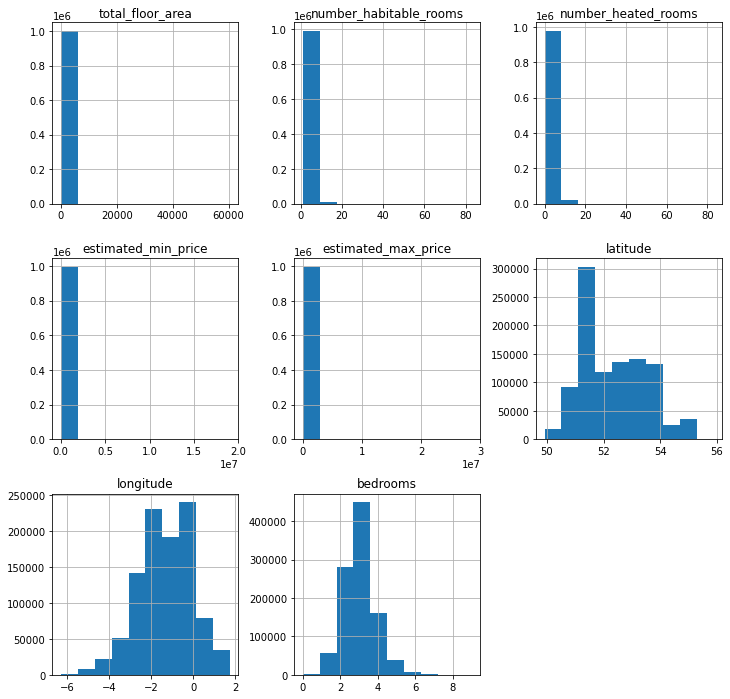

In [7]:
plot=df.hist(figsize=[12,12])

<AxesSubplot:>

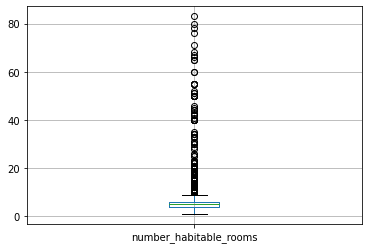

In [8]:
df.boxplot(column='number_habitable_rooms')

In [9]:
#Removing the number_habitable_rooms outliers
Q1 = df['number_habitable_rooms'].quantile(0.25)
Q3 = df['number_habitable_rooms'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker= Q1-(1.5*IQR)
upper_whisker= Q3+(1.5*IQR)
print("IQR = " + str(IQR))
print("Lower whisker value = " + str(lower_whisker))
print("Upper whisker value = " + str(upper_whisker))

IQR = 2.0
Lower whisker value = 1.0
Upper whisker value = 9.0


The graph and the plots above show that there some potential outliers in the data. When it comes to building a model using the data, it's important to try remove any incorrect data entries as they will affect the model and cause it to be less accurate at prediciting correct data.

Two outliers can be seen by values for total_floor_area. They are both above 5000 which seems extremely large compared to the rest of the data, and the price of the properties doesn't seem to proportionally match a property of that size.

The next outliers in the data come from the number of habitable rooms. Although the boxplot would suggest that properties with 9 rooms or more are outliers, and suggest these are data error, that wouldn't be appropraite as some properties have more than 9 rooms and aren't data errors. I will try to use a set of rules that will look to combine number_habitable_rooms, number_heated_rooms, and total_floor_area in an attempt to get rid of incorrect entries.



## Removing Outliers and Potential Incorrect Data Entries

Checking the data for any missing entries

In [10]:
# Creating an ID for each property so potential ouliers and incorrect data can be more easily removed
df["ID"]=df.index
df.head()

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,ID
0,Flats/Maisonettes,39.0,1,1,103000,126000,52.164661,-1.856154,0,0
1,Flats/Maisonettes,24.0,1,1,36000,44000,52.523281,-2.054445,0,1
2,Flats/Maisonettes,25.0,1,1,187000,229000,51.386343,-0.108323,0,2
3,Flats/Maisonettes,27.0,1,1,234000,350000,51.416946,-0.151787,2,3
4,Flats/Maisonettes,29.0,1,1,185000,277000,52.915728,-1.475258,1,4


In [11]:
df.isna().sum()

property_type             0
total_floor_area          0
number_habitable_rooms    0
number_heated_rooms       0
estimated_min_price       0
estimated_max_price       0
latitude                  0
longitude                 0
bedrooms                  0
ID                        0
dtype: int64

In [12]:
df[df['total_floor_area']<5000]

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,ID
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154,0,0
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445,0,1
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323,0,2
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787,2,3
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258,1,4
...,...,...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611,3,999995
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064,5,999996
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065,4,999997
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915,4,999998


In [13]:
#Removing the total_floor_area outlier
clean_data=df[df['total_floor_area']<5000]

In [14]:
clean_data[clean_data['number_habitable_rooms']>upper_whisker]

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,ID
5,Detached,270.00,11,11,475000,580000,52.910147,-1.525024,6,5
8,Detached,125.97,11,11,913000,1120000,51.784224,0.940864,5,8
9,Detached,298.00,12,12,973000,1070000,51.943917,0.690980,6,9
14,Detached,523.00,13,13,2590000,3160000,51.267912,0.180872,7,14
19,Detached,451.60,13,13,1000000,1500000,51.360618,0.352150,7,19
...,...,...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611,3,999995
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064,5,999996
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065,4,999997
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915,4,999998


In [15]:
#Creating a temporary variable to calculate the difference between the total number of rooms and total number of heated rooms in a property
clean_data['total_heated_room_diff']=clean_data['number_habitable_rooms']-clean_data['number_heated_rooms']

/opt/anaconda3/envs/ML_Environ/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
clean_data[(clean_data['number_habitable_rooms']>25)]

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,ID,total_heated_room_diff
86,Terraced,49.0,31,3,276000,305000,51.143642,-0.973289,2,86,28
132,Terraced,79.0,40,4,149000,165000,52.640749,-1.159183,2,132,36
180,Flats/Maisonettes,92.0,42,4,833000,1020000,51.512505,-0.072707,3,180,38
518,Terraced,92.0,40,40,193000,213000,52.092644,-1.934198,2,518,0
664,Detached,116.0,31,3,239000,358000,54.535137,-2.391234,2,664,28
...,...,...,...,...,...,...,...,...,...,...,...
8415,Terraced,70.0,40,4,104000,127000,53.386797,-2.854309,2,8415,36
8425,Terraced,65.0,40,4,93000,113000,53.507133,-2.203357,2,8425,36
8430,Detached,70.0,44,44,207000,228000,53.280956,-3.587758,2,8430,0
8711,Flats/Maisonettes,61.0,30,30,260000,287000,50.826841,-0.186748,2,8711,0


In [17]:
#Removing data entries that have over 25 rooms in the house
clean_data=clean_data[(clean_data['number_habitable_rooms']<25)]

In [18]:
clean_data[(clean_data['number_habitable_rooms']>15) & (clean_data['total_floor_area']<150)& (clean_data['total_heated_room_diff']>5)]

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,ID,total_heated_room_diff
44,Flats/Maisonettes,81.00,23,3,211000,258000,51.453772,-3.180729,2,44,20
88,Terraced,60.96,16,3,324000,358000,51.296077,-0.825805,2,88,13
632,Flats/Maisonettes,52.93,22,2,233000,258000,51.618891,-0.395881,1,632,20
2720,Semi-Detached,115.00,18,12,343000,380000,53.332616,-0.211362,3,2720,6
2885,Terraced,78.00,16,8,110000,135000,53.760925,-0.407598,3,2885,8
2954,Semi-Detached,91.00,18,2,232000,256000,50.391028,-4.158928,3,2954,16
3027,Flats/Maisonettes,34.00,21,2,88000,132000,51.015063,-3.094628,1,3027,19
3495,Detached,89.00,20,12,457000,505000,51.755965,0.500955,3,3495,8
3846,Terraced,94.00,19,5,171000,190000,52.242234,-0.888068,2,3846,14
4488,Flats/Maisonettes,48.00,20,2,359000,438000,51.491584,-0.091697,2,4488,18


In [19]:
df_remove=clean_data[(clean_data['number_habitable_rooms']>15) & (clean_data['total_floor_area']<150)& (clean_data['total_heated_room_diff']>5)]

In [20]:
#Removing the data entries that have been highlighted above as not looking correct
final_data=clean_data[~clean_data["ID"].isin(df_remove["ID"])]
final_data=final_data.drop(['ID', 'total_heated_room_diff'], axis=1)
final_data

,property_type,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms
0,Flats/Maisonettes,39.00,1,1,103000,126000,52.164661,-1.856154,0
1,Flats/Maisonettes,24.00,1,1,36000,44000,52.523281,-2.054445,0
2,Flats/Maisonettes,25.00,1,1,187000,229000,51.386343,-0.108323,0
3,Flats/Maisonettes,27.00,1,1,234000,350000,51.416946,-0.151787,2
4,Flats/Maisonettes,29.00,1,1,185000,277000,52.915728,-1.475258,1
...,...,...,...,...,...,...,...,...,...
999995,Detached,241.00,10,10,1480000,1800000,51.329410,-0.362611,3
999996,Detached,286.00,10,10,1630000,1800000,51.380529,-0.430064,5
999997,Semi-Detached,250.00,10,10,1240000,1510000,51.309676,-0.306065,4
999998,Semi-Detached,218.00,10,10,454000,682000,54.160256,-0.778915,4


As the property_type column is current a character, to be able to us the information of property type in model building, the values need to be converted using one-hot encoding

In [21]:
#final_static_vars = final_static_vars.dropna().drop(final_static_vars.columns[0], axis=1)
final_data.info()
dummies = pd.get_dummies(final_data[['property_type']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999918 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   property_type           999918 non-null  object 
 1   total_floor_area        999918 non-null  float64
 2   number_habitable_rooms  999918 non-null  int64  
 3   number_heated_rooms     999918 non-null  int64  
 4   estimated_min_price     999918 non-null  int64  
 5   estimated_max_price     999918 non-null  int64  
 6   latitude                999918 non-null  float64
 7   longitude               999918 non-null  float64
 8   bedrooms                999918 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 76.3+ MB


In [22]:
dummies

,property_type_Detached,property_type_Flats/Maisonettes,property_type_Semi-Detached,property_type_Terraced
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
999995,1,0,0,0
999996,1,0,0,0
999997,0,0,1,0
999998,0,0,1,0


In [23]:
# Drop the column with the columns for which we created dummy variables
final_data = final_data.drop([ 'property_type'], axis = 1).astype('float64')

# Define the feature set X.

final_data = pd.concat([final_data, dummies], axis = 1)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999918 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   total_floor_area                 999918 non-null  float64
 1   number_habitable_rooms           999918 non-null  float64
 2   number_heated_rooms              999918 non-null  float64
 3   estimated_min_price              999918 non-null  float64
 4   estimated_max_price              999918 non-null  float64
 5   latitude                         999918 non-null  float64
 6   longitude                        999918 non-null  float64
 7   bedrooms                         999918 non-null  float64
 8   property_type_Detached           999918 non-null  uint8  
 9   property_type_Flats/Maisonettes  999918 non-null  uint8  
 10  property_type_Semi-Detached      999918 non-null  uint8  
 11  property_type_Terraced           999918 non-null  uint8  
dtypes:

In [24]:
final_data.describe()

,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,property_type_Detached,property_type_Flats/Maisonettes,property_type_Semi-Detached,property_type_Terraced
count,999918.000000,999918.000000,999918.000000,9.999180e+05,9.999180e+05,999918.000000,999918.000000,999918.000000,999918.000000,999918.000000,999918.000000,999918.000000
mean,95.043050,4.728532,4.643274,3.258834e+05,3.768329e+05,52.341371,-1.304292,2.869462,0.224069,0.139704,0.302972,0.333254
std,47.772331,1.625114,1.665736,2.946756e+05,3.555455e+05,1.130431,1.298815,0.978502,0.416968,0.346680,0.459543,0.471377
min,0.000000,1.000000,0.000000,1.000000e+04,1.500000e+04,49.912711,-6.312345,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.810500,4.000000,4.000000,1.670000e+05,1.920000e+05,51.460903,-2.187913,2.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,5.000000,5.000000,2.560000e+05,2.930000e+05,52.093543,-1.328605,3.000000,0.000000,0.000000,0.000000,0.000000
75%,108.000000,6.000000,5.000000,3.920000e+05,4.490000e+05,53.359286,-0.251461,3.000000,0.000000,0.000000,1.000000,1.000000
max,3944.000000,23.000000,23.000000,1.906000e+07,2.858000e+07,55.879634,1.757928,9.000000,1.000000,1.000000,1.000000,1.000000


### Correlation in the data

In [25]:
final_data.corr()

,total_floor_area,number_habitable_rooms,number_heated_rooms,estimated_min_price,estimated_max_price,latitude,longitude,bedrooms,property_type_Detached,property_type_Flats/Maisonettes,property_type_Semi-Detached,property_type_Terraced
total_floor_area,1.000000,0.758278,0.736136,0.554731,0.559834,-0.025104,-0.008327,0.672573,0.411273,-0.282495,-0.031162,-0.125657
number_habitable_rooms,0.758278,1.000000,0.960477,0.444759,0.436861,0.018218,-0.043825,0.813359,0.424035,-0.450609,0.056388,-0.098656
number_heated_rooms,0.736136,0.960477,1.000000,0.441754,0.432931,0.018658,-0.030301,0.787369,0.421566,-0.431418,0.052236,-0.106539
estimated_min_price,0.554731,0.444759,0.441754,1.000000,0.990844,-0.330069,0.254034,0.425382,0.275961,-0.101382,-0.055127,-0.115803
estimated_max_price,0.559834,0.436861,0.432931,0.990844,1.000000,-0.311413,0.239190,0.413205,0.271734,-0.086646,-0.061232,-0.116949
latitude,-0.025104,0.018218,0.018658,-0.330069,-0.311413,1.000000,-0.195588,0.001149,-0.028754,-0.126473,0.086891,0.033742
longitude,-0.008327,-0.043825,-0.030301,0.254034,0.239190,-0.195588,1.000000,-0.026115,-0.018145,0.123386,-0.044062,-0.031739
bedrooms,0.672573,0.813359,0.787369,0.425382,0.413205,0.001149,-0.026115,1.000000,0.386671,-0.444723,0.076935,-0.089965
property_type_Detached,0.411273,0.424035,0.421566,0.275961,0.271734,-0.028754,-0.018145,0.386671,1.000000,-0.216551,-0.354287,-0.379916
property_type_Flats/Maisonettes,-0.282495,-0.450609,-0.431418,-0.101382,-0.086646,-0.126473,0.123386,-0.444723,-0.216551,1.000000,-0.265679,-0.284898


From the output above, we can see that most of the variables in the data have relatively strong postive relationship with the number of bedrooms in a property. 

This isn't the case though for the variables for latitude, longitude, property_type_Semi-Detached, and property_type_Terraced, which don't have strong relation shit with the number of bedrooms. 

The only negatively correlated variable which has some correlation with the number of beds is property_type_Flats/Maisonettes.

# Model Building

Splitting the data into training, validation, and testing datasets. The percentage split across the data will be 60/20/20

In [26]:
# Model selection on the training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_data.drop(columns="bedrooms"), 
                                                    final_data["bedrooms"], 
                                                    test_size=0.2, random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size=0.25, random_state=1234)

In [27]:
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(y_train))
print(len(y_val))
print(len(y_test))

599950
199984
199984
599950
199984
199984


## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lin_reg_mdl = LinearRegression()    # sets up the algorithm (or learner)

In [30]:
lin_reg_mdl.fit(x_train, y_train)       # trains the model using the training set

LinearRegression()

In [31]:
lin_reg_mdl.coef_       # shows the learnt coefficients (or betas)

array([ 2.58478275e-03,  3.50126981e-01,  2.68687254e-02,  1.21306482e-06,
       -8.48748847e-07,  2.12069843e-03, -1.40912348e-03,  1.26883285e-01,
       -2.51402569e-01,  1.01114721e-01,  2.34045632e-02])

In [32]:
y_pred = lin_reg_mdl.predict(x_val)     # predicts new classes using the val set 

In [33]:
# As the number of beds in a house is a whole number, the predictions are rounded
y_pred=np.round(y_pred)

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_pred)

0.29503360268821505

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred)

0.35237819025522044

In [36]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7278282262581006

## Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

x_train_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
x_val_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_val)

lin_reg_mdl2 = LinearRegression()    # sets up the algorithm (or learner)

lin_reg_mdl2.fit(x_train_, y_train)       # trains the model using the training set

lin_reg_mdl2.coef_       # shows the learnt coefficients (or betas)

y_pred_ = lin_reg_mdl2.predict(x_val_)     # predicts new classes using the val set 

# As the number of beds in a house is a whole number, the predictions are rounded
y_pred_=np.round(y_pred_)



In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_pred_)

0.2749519961596928

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_pred_)

0.32844627570205615

In [40]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_)

0.7466747339787183

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Producing a cross validation run for a random forest model on the data

# Instantiate model with 1000 decision trees
rf_mdl = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf_mdl.fit(x_train, y_train);

In [43]:
y_val_pred_rf = rf_mdl.predict(x_val)
y_val_pred_rf=np.round(y_val_pred_rf)

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_pred_rf)

0.26491119289543164

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_val_pred_rf)

0.31651532122569803

In [46]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred_rf)

0.7563805104408353

## Random Forest Hyperparameter Tuning

This section can be left out from running all of the code as it takes up quite a bit of time

>1 -0.580 (0.000)
>2 -0.375 (0.009)
>3 -0.311 (0.002)
>4 -0.291 (0.001)
>5 -0.282 (0.001)
>6 -0.276 (0.001)
>7 -0.273 (0.001)
>None -0.277 (0.001)


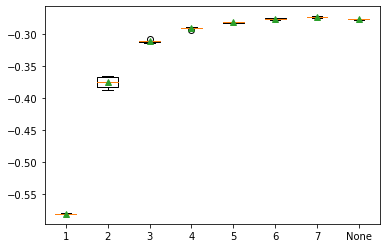

In [49]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
# consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,8)] + [None]
    for n in depths:
        models[str(n)] = RandomForestRegressor(max_depth=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
# evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
    scores = evaluate_model(model, x_train, y_train)
# store the results
    results.append(scores)
    names.append(name)
# summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 -0.270 (0.001)
>2 -0.271 (0.001)
>3 -0.272 (0.000)
>4 -0.273 (0.000)
>5 -0.273 (0.001)
>6 -0.274 (0.000)
>7 -0.274 (0.001)


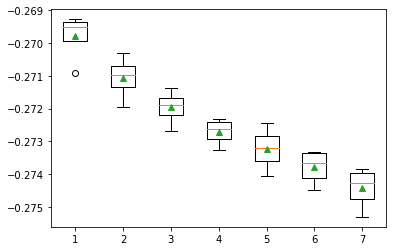

In [51]:
# explore random forest number of features effect on performance
# get a list of models to evaluate
def get_models():
    models = dict()
# explore number of features from 1 to 7
    for i in range(1,8):
        models[str(i)] = RandomForestRegressor(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
# evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
    scores = evaluate_model(model, x_train, y_train)
# store the results
    results.append(scores)
    names.append(name)
# summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 -0.300 (0.001)
>50 -0.279 (0.001)
>100 -0.276 (0.001)


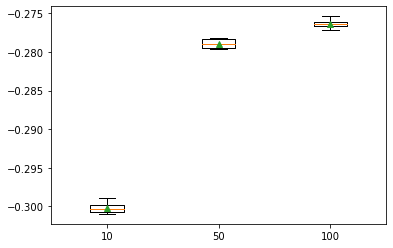

In [52]:
# explore random forest number of trees effect on performance
# get a list of models to evaluate
def get_models():
    models = dict()
# define number of trees to consider
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = RandomForestRegressor(n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)
# evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
# evaluate the model
    scores = evaluate_model(model, x_train, y_train)
# store the results
    results.append(scores)
    names.append(name)
# summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Random Forest - Defined Hyperparameters

In [47]:
#Producing a cross validation run for a random forest model on the data

# Instantiate model with 1000 decision trees
rf_mdl_tun = RandomForestRegressor(max_depth=7, max_features=1, n_estimators = 100, random_state = 42)
# Train the model on training data
rf_mdl_tun.fit(x_train, y_train);

In [48]:
y_val_pred_rf_tun = rf_mdl_tun.predict(x_val)
y_val_pred_rf_tun=np.round(y_val_pred_rf_tun)

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_pred_rf_tun)

0.2837727018161453

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_val_pred_rf_tun)

0.3388071045683655

In [51]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_val_pred_rf_tun)

0.7387240979278342

From the models produced above, the best performing model in terms of accuracy score was the first Random Forest model, with an accuracy score of 0.756.

## Testing Final Model on Test Data

In [52]:
y_test_pred_rf = rf_mdl.predict(x_test)
y_test_pred_rf=np.round(y_test_pred_rf)

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred_rf)

0.2650062004960397

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred_rf)

0.31695035602848226

In [55]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred_rf)

0.7563055044403553

### Saving the best model

In [56]:
import pickle
# save the model to disk
pickle.dump(rf_mdl, open('final_model.pkl', 'wb'))

In [57]:
final_model = pickle.load(open('final_model.pkl', 'rb'))
result = final_model.predict(x_test)
result=np.round(result)
print(result)

[2. 3. 4. ... 2. 3. 3.]
